In [2]:
import time
from collections import deque, namedtuple

import numpy as np
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import MSE
from tensorflow.keras.optimizers import Adam

In [3]:
import gymnasium as gym
from gym_anytrading.datasets import STOCKS_GOOGL
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 


data = STOCKS_GOOGL.copy()
env = gym.make(
    'stocks-v0',
    df=data,
    window_size=10,
    frame_bound=(10, 300))

observation = env.reset()

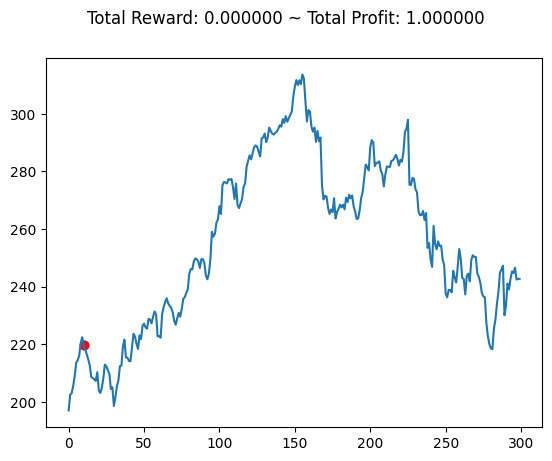

In [4]:
env.render()

In [5]:
STOCKS_GOOGL.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-05-22,198.528534,199.524521,196.196198,196.946945,196.946945,3433700
2009-05-26,196.171173,202.702698,195.195190,202.382385,202.382385,6202700
2009-05-27,203.023026,206.136139,202.607605,202.982986,202.982986,6062500
2009-05-28,204.544540,206.016022,202.507507,205.405411,205.405411,5332200
2009-05-29,206.261261,208.823822,205.555557,208.823822,208.823822,5291100


In [10]:
q_network = model = Sequential([
    Input(shape=(env.observation_space.shape[0],)),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(2,activation='linear')])

target_q_network= model = Sequential([
    Input(shape=(env.observation_space.shape[0],)),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(2,activation='linear')])



In [8]:
experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

In [9]:
def compute_loss(experiences, gamma=0.99):
    state,action,reward,next_state,done = experiences
    target = reward + gamma*target_q_network(state)*(done-1)
    q_values = q_network(state).tf.gather_nd(q_values, tf.stack([tf.range(q_values.shape[0]),
                                                tf.cast(action, tf.int32)], axis=1))
    loss = MSE(target, q_values)

    return loss